### MultiVariate Linear Regression with L2 Regularization

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
df=pd.read_csv("AdmissionDataset/data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


**Drop the Serial No because it is irrelevant in prediction**

In [165]:
df.drop('Serial No.',axis=1,inplace=True)

In [166]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


#### Spliting the data into training and Validation set

In [167]:
training_data = df.sample(frac = 0.8, random_state = 200)
testing_data = df.drop(training_data.index)

### Feature Normalisation
${x_i}$= $\frac{x_i - \mu}{\sigma}$ 

<font color="blue">
Feature Normalisation is done because data in some columns value is very small in comparison to other columns data.This lead to slow learning.</font>


> By Doing the Normalisation we just make the learning fast because gradient descent works smoothly.

#### Preparing the Training data

In [168]:
columns=training_data.shape[1]

X=training_data.iloc[:,0:columns-1]# features Sets

mu = X.mean()
sigma = X.std()

# features normalisation
X=(X-X.mean())/X.std()

Y=training_data.iloc[:,columns-1:columns] # outputSet
X.insert(0, 'Ones', 1)

print(Y.shape)
print(X.shape)
X.head()

(360, 1)
(360, 8)


,Ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
198,1,-0.126730,-1.030256,-0.105307,0.130771,1.132289,0.911363,-1.091697
39,1,-0.389434,-0.366764,-0.986945,-0.881652,-0.487409,-0.769447,-1.091697
215,1,-0.739706,0.462602,-0.105307,0.130771,-0.487409,-0.969147,0.913461
303,1,-0.389434,0.130855,-0.105307,0.130771,-0.487409,-0.087138,-1.091697
377,1,0.398678,0.296729,0.776331,0.636983,0.592390,0.162488,0.913461


> Convert the X and Y into numpy matrix because we are going to do the vectorised Implementation

In [169]:
X_train = np.matrix(X.values)
Y_train = np.matrix(Y.values)
print(X_train.shape)
print(Y_train.shape)



(360, 8)
(360, 1)


#### Preparing the validation/Test data

In [170]:
columns=testing_data.shape[1]

X=testing_data.iloc[:,0:columns-1]# features Sets

Y=testing_data.iloc[:,columns-1:columns] # outputSet

# features normalisation
X=(X-mu)/sigma


X.insert(0, 'Ones', 1)

X_test = np.matrix(X.values)
Y_test = np.matrix(Y.values)

print(X_test.shape)
print(Y_test.shape)

X.head()

(90, 8)
(90, 1)


,Ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,0.048406,-0.698510,-0.986945,-0.881652,-1.567208,-0.719522,-1.091697
1,1,0.223542,0.130855,-0.105307,-0.375440,0.052490,-0.070496,0.913461
3,1,0.836518,0.960221,1.657969,1.143194,0.592390,1.360689,0.913461
6,1,0.486246,0.462602,1.657969,1.143194,0.592390,0.645096,-1.091697
7,1,-0.827274,-0.035018,-0.986945,-0.375440,0.052490,-0.103779,0.913461


#### Mean Square Error with  L2 Regularization
${J(\theta)}$=${\frac{1}{2*m}}{\sum_{i=0}^{m}}$(${\hat{y_i}-{y_i})^2 +  \frac{\lambda}{2m}*\parallel \theta \parallel^2}$ 


J: is cost function


m : no. of training examples

${\theta}$: parameters

${\lambda}$: Regularization coefficient

In [171]:
def costCompute_L2(X,Y,theta,lambd):
    err=0.0
    
    m=X.shape[0] ## no of training examples
    
    err = np.sum(np.power(np.dot(X,theta.T)-Y,2))
    err = err/(2*m)
    
    reg= (lambd/(2*m))*np.sum(np.square(theta))
    
    return err+reg

#### Gradient Descent algo
repeat Untill Converges{


${{\theta_j} :=}{{\theta_j}}$-${\alpha}$*${\frac{\partial}{\partial {\theta_j}} J(\theta)}$


}

${\alpha}$: Learning rate constant

In [172]:
#Vectorised Implementation
def gradientDescent(X, y, theta, alpha, iters,lambd):
    
    Jhistory=np.zeros(iters)
    ThetaforCoffiecients=np.zeros((iters,theta.shape[1]))
    
    temp=0.0
    m=X.shape[0]
    
    for i in range(iters):
        
        pre = np.dot(X,theta.T)-y
        
        temp=theta[0,0]-(alpha/m)*np.sum(pre)
            
        
        delta=np.dot(np.transpose(pre),X)
        theta=theta*(1-(alpha*lambd)/m)-(alpha/m)*delta
        
        theta[0,0]=temp
        Jhistory[i] = costCompute_L2(X, y, theta,lambd)
        
        ThetaforCoffiecients[i]=theta
        

    return theta,Jhistory,ThetaforCoffiecients

In [173]:
alpha=.009
iters=1000
lambd=0.7

theta = np.matrix(np.random.randn(1,X_train.shape[1]))*0.1 ### initialization by random no.

print(theta.shape)

minTheta, cost,Big= gradientDescent(X_train, Y_train, theta, alpha, iters,lambd)

print(minTheta.shape)
print(minTheta)

(1, 8)
(1, 8)
[[ 0.71970128  0.01027364  0.04228102  0.01543677 -0.00922608  0.02207673
   0.0537466   0.01621968]]


Text(0.5, 1.0, 'Visualisation of change in Cost w.r.t to iterations')

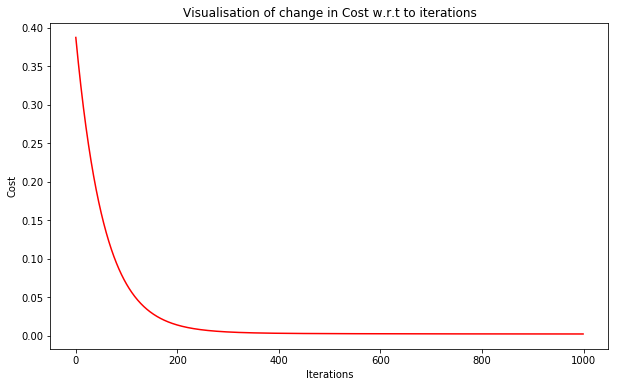

In [174]:
ig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Visualisation of change in Cost w.r.t to iterations')    

In [175]:
def prediction_Error(X,Y,finalParameter):
    out= np.dot(X,finalParameter.T)
    
    ###Mean square error
    err= np.sum(np.power(out-Y,2))/X.shape[0]
    
    return err,out
    

In [176]:
err,output=prediction_Error(X_train,Y_train,minTheta)

In [177]:
print(err)

0.003898338140468169


In [178]:
from sklearn.metrics import r2_score
r2_score(Y_train, output)

0.8117877969093074

#### For different - different choice of Regularisation Parameter

In [179]:
choice_lambda=[.001,.03,.09,.3,.9,1.2,1.5,2,2.5]

err_train=[]
err_test=[]
Big_minTheta=np.zeros((len(choice_lambda),theta.shape[1]))
count=0
alpha=.009
iters=1000
for l in choice_lambda:
    theta = np.matrix(np.random.randn(1,X_train.shape[1]))  ## initialisation of theta
    
    ##training 
    minTheta,_,_= gradientDescent(X_train, Y_train, theta, alpha, iters,l)
    
    Big_minTheta[count]=minTheta
    count+=1
    
    err1,_=prediction_Error(X_train,Y_train,minTheta)
    err2,_=prediction_Error(X_test,Y_test,minTheta)

    err_train.append(err1)
    err_test.append(err2)

Text(0.5, 1.0, 'Training Error vs Reg. Parameter')

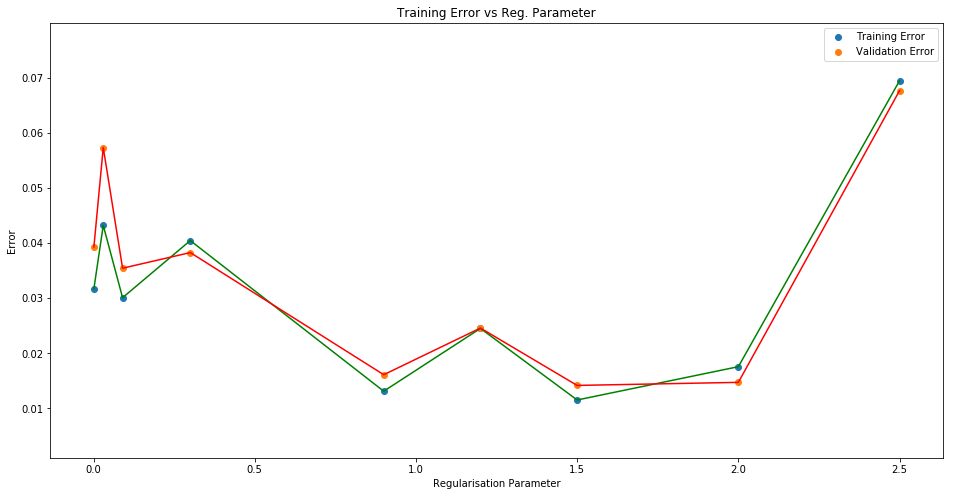

In [96]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.scatter(choice_lambda,err_train,label="Training Error")
plt.plot(choice_lambda,err_train,'g')
plt.scatter(choice_lambda,err_test,label="Validation Error")
plt.plot(choice_lambda,err_test,'r')

plt.legend()

plt.xlabel('Regularisation Parameter')
plt.ylabel('Error')
plt.title('Training Error vs Reg. Parameter')

In [97]:
print(err_train)
print(err_test)

[0.031693210725952305, 0.04318858249160548, 0.03007393139805721, 0.04043075176814746, 0.013111932623203317, 0.024499579147913744, 0.01151990762890765, 0.017561775291290105, 0.06942123290047746]
[0.03927125260942397, 0.05730793223568188, 0.03541843148913377, 0.03825508056137461, 0.01610534720343545, 0.02456842406894073, 0.014162668809268345, 0.014718346654230652, 0.0676239704364469]


**Observations**:

<font color="purple" size="3">
<ul>
    <li>  The value of $\lambda$ is a hyperparameter that you can tune using a validation set.</li>
 <li>    If ${\lambda}$ value is too small then it might leads to the overfit(high variance) which leads to high error on validation dataset and low error on train datasets.</li>
<li>If ${\lambda}$ value is too large then it leads to the underfit(high bias) which leads to high error on validation dataset and high error on train datasets.</li>
    </ul>
</font


#### Part3

${Regularization \; Coefficient \; \lambda \; plays \; a \; very \; Important \; role \; in \;deciding \;between \;bias \;and\; variance.}$

1. First calculate the  Training error and Validation Error ,then

**if(Training Error is small and Validation Error is large)**

<font color="blue" size="3">
then it is case of overfitting(high variance) ====> and this can be solve by increasing ${\lambda}$</font>

**if(both the error are very large)**

<font color="green" size="3">
then it might be underfit(high bias) ====> and this can be solve by decreasing ${\lambda}$</font>


==========================================================================================================<br>
**Sitiuation depends on value of ${\lambda}$**


<font size="3">
2. If ${\lambda}$ value is too large then it leads to the underfit(high bias) becuase it penalise the all the weights and weights approches to zero , which leads to linear curve ,hence underfit.</font>

<br>
<br>
<font size="3">
3. If ${\lambda}$ value is too small then it might leads to the overfit(high variance) because free parameters (weights) that the learning algorithm can fit the training data too closely. This increases the generalization error.</font>

************************************************************************************************

#### Part4

#### Affect of L2 regularisation on Weights 

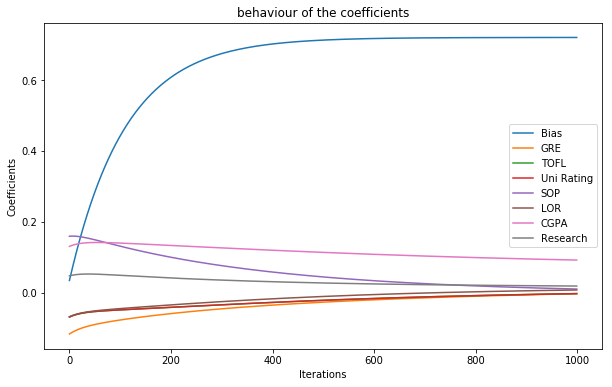

In [99]:
plt.rcParams['figure.figsize'] = [10, 6]
l1=Big[:,0]
l2=Big[:,1]
l3=Big[:,3]
l4=Big[:,4]
l5=Big[:,5]
l6=Big[:,6]
l7=Big[:,7]

it=range(0,iters)
plt.plot(it,list(l1),label="Bias")
plt.plot(it,list(l2),label="GRE")
plt.plot(it,list(l3),label="TOFL")

plt.plot(it,list(l3),label="Uni Rating")
plt.plot(it,list(l4),label="SOP")
plt.plot(it,list(l5),label="LOR")
plt.plot(it,list(l6),label="CGPA")
plt.plot(it,list(l7),label="Research")

plt.xlabel("Iterations")
plt.ylabel("Coefficients")
plt.title("behaviour of the coefficients")
plt.legend()
plt.show()

- Notice that for L1 regularization, the gradient is either 1 or -1, except for when ${𝑤1}$=0. That means that L1-regularization will move any weight towards 0 with the same step size, regardless the weight's value.

- In contrast, you can see that the L2 gradient is linearly decreasing towards 0 as the weight goes towards 0. Therefore, L2-regularization will also move any weight towards 0, but it will take smaller and smaller steps as a weight approaches 0.

**Difference between L1 and L2 regularization :**
1. L2 regularization is differentiable everywhere but L1 is not differentiable at 0.

2. In L1 regularization weights can  tends more to zero as compared to L2 regularization.

3.
-   With L1 regularization, you penalize the model by a loss function ${L1(w) = \sum_{i=0}^{N}{ \left| w \right| }}$

- With L2-regularization, you penalize the model by a loss function ${L2(w) =\frac{1}{2} \sum_{i=0}^{N}{(w_i)^2 }}$

*******************************************************************************************************

### General Observations

**Why any type regularization is needed**

> <font size="3">Supervised learning algorithms often over-fit training data.
Overfitting occurs when there are so many free parameters that the learning algorithm can fit the training data too closely.
This increases the generalization error.</font>


### What is L2-regularization actually doing?:

<font size="3">
L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. </font>

<br>
<br>

**What you should remember**-- 
the implications of L2-regularization on:
-  The cost computation:
    - A regularization term is added to the cost
    
   >  ${J(\theta)}$=${\frac{1}{2*m}}{\sum_{i=0}^{m}}$(${\hat{y_i}-{y_i})^2 +  \frac{\lambda}{2m}*\parallel \theta \parallel^2}$ 


> J: is cost function<br>
> m : no. of training examples<br>
>${\theta}$: parameters<br>
>${\lambda}$: Regularization coefficient

<br></br>
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.


<br></br>
<br></br>
###  What is L1-regularization actually doing?:

<font size="3">
L1-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the  values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model. </font>

<br>
<br>

**What you should remember**-- 
the implications of L1-regularization on:
-  The cost computation:
    - A regularization term is added to the cost
    

> ${J(\theta)}$=${\frac{1}{2m}}{\sum_{i=0}^{m}}$(${\hat{y_i}-{y_i})^2 +  \frac{\lambda}{m}*\parallel \theta  \parallel}$ <br>
> J: is cost function<br>
>m : no. of training examples<br>
>${\theta}$: parameters<br>
>${\lambda}$: Regularization Coefficient
    
    
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.
    
    


**Conclusion**:
<font size="3" color="g">
    <ul>
        <li>
        L2 regularization works better in most of the cases than L1 regularization.
        </li>
        <li>L1 regularization helps perform feature selection in sparse feature spaces, and that is a good practical reason to use L1 in some situations.
        </li>
    </ul>
</font>

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- Regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "Underfit", resulting in a model with high bias.
